In [49]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
#TODO:
# overall measure ranking
# evtl in which countries did the best work
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, fixed
import pandas as pd
from random import choice
from helpers.mappers import acaps_country_name_mapper, acaps_measure_mapper
from helpers.utils import generate_dates
from helpers.data_extractors import extract_oxford_measure_data,merge_country_dfs
from helpers.data_extractors import calculate_transmission_data, create_measure_success_tuple
from matplotlib import pyplot as plt

from datetime import timedelta
from collections import defaultdict
import seaborn as sns
from helpers.visualisation import visualise_measures_for_country, visualise_measure_ranking, visualise_effect_restriction_relation,visualize_country_forecast,create_toggle_buttons
sns.set()

In [51]:
country_dfs = extract_oxford_measure_data()

In [52]:
def f(x):
    visualise_measures_for_country(country_dfs, x)

dropdown = widgets.Dropdown(
    options=sorted(country_dfs.keys()),
    value='Germany',
    description='Country:')
interact(f, x=dropdown);


interactive(children=(Dropdown(description='Country:', index=12, options=('Argentina', 'Australia', 'Austria',…

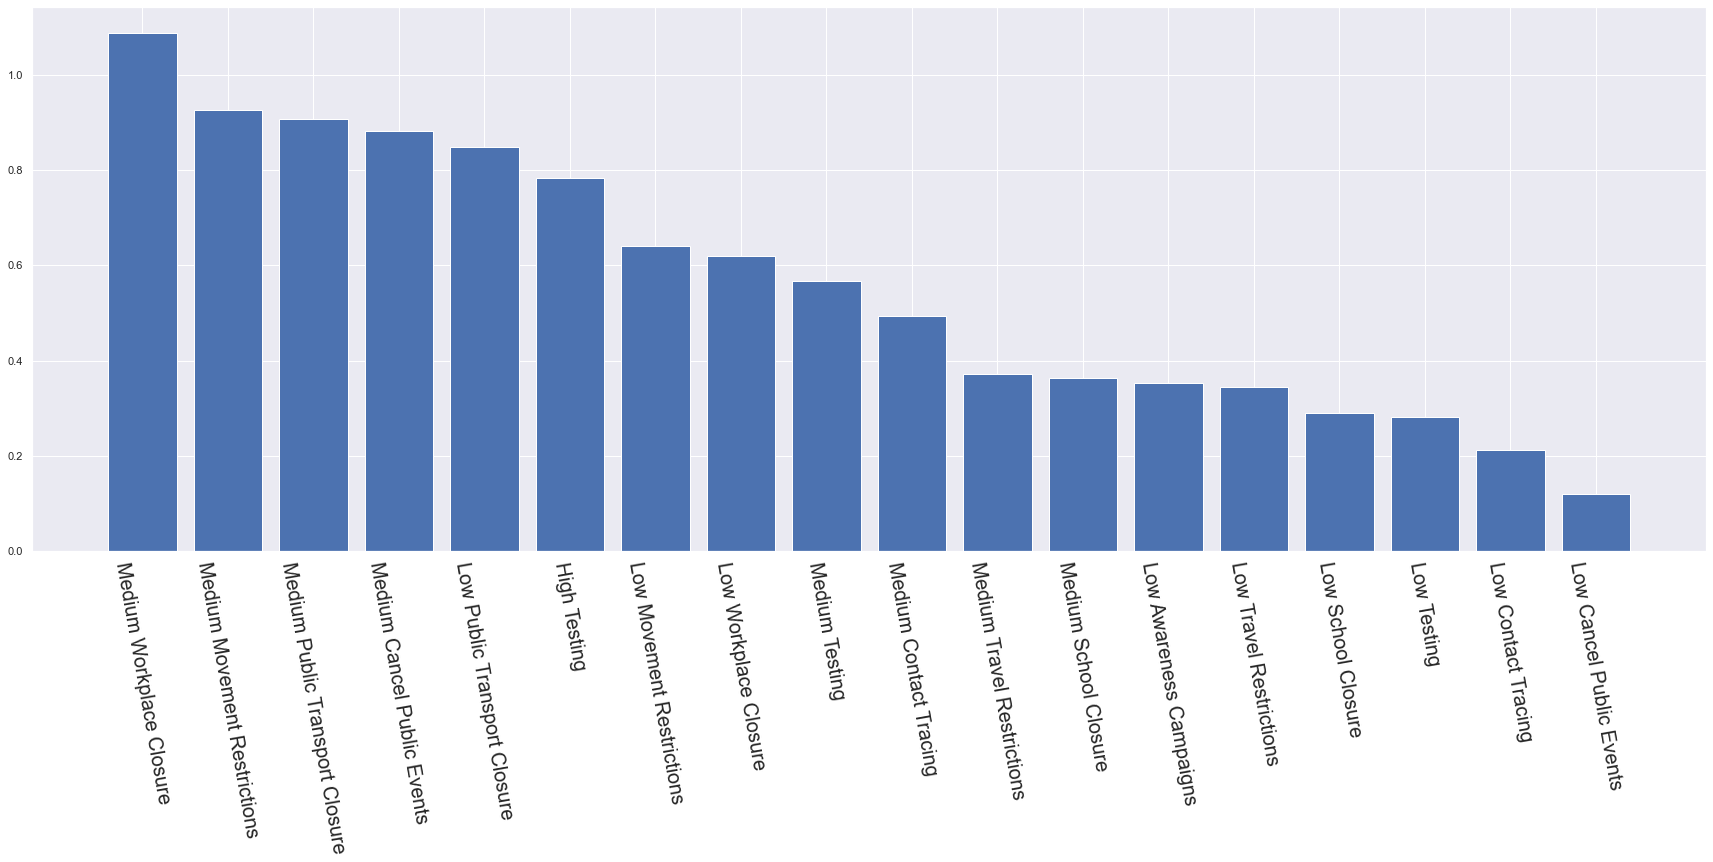

In [53]:
visualise_measure_ranking(country_dfs)

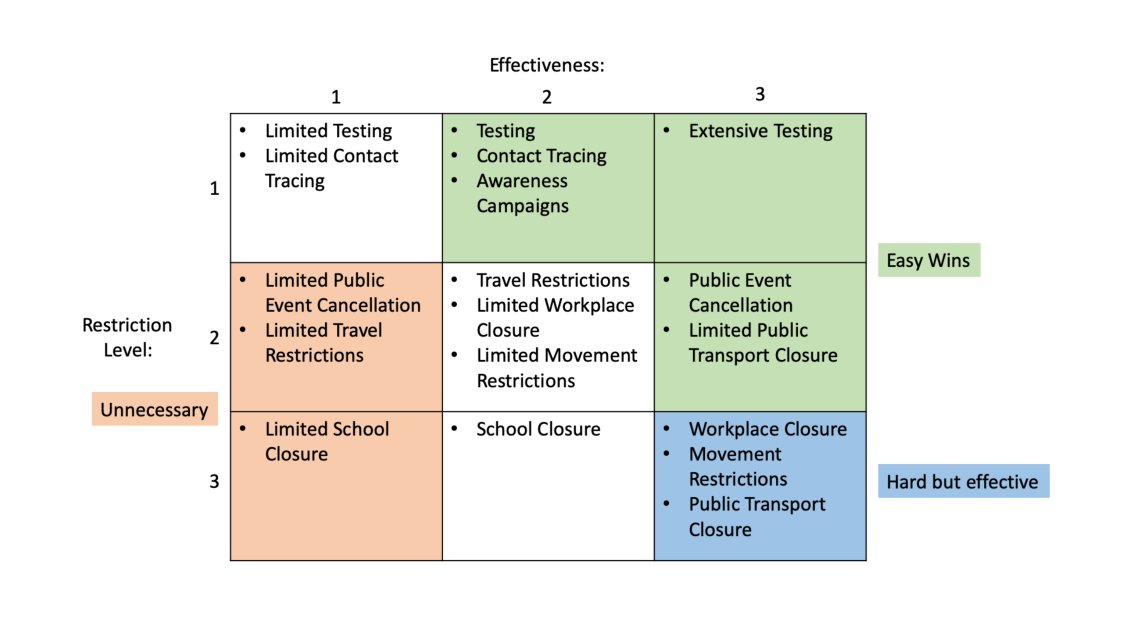

In [54]:
plt.rcParams["axes.grid"] = False
visualise_effect_restriction_relation()
plt.axis('off');

In [55]:
interact_manual = interact.options(manual=True, manual_name="Calculate")

In [63]:
global toggle_buttons
def f(x):
    global toggle_buttons
    country_name = x.value
    active_measures = []
    for toggle_button in toggle_buttons:
        if toggle_button.value:
            active_measures.append(toggle_button.description)
    visualize_country_forecast(country_dfs, country_name, active_measures)
    
def create_buttons(x):
    global toggle_buttons
    toggle_buttons = create_toggle_buttons(country_dfs,x)
    
dropdown = widgets.Dropdown(
    options=sorted(country_dfs.keys()),
    value='Germany',
    description='Country:');

interact(create_buttons, x=dropdown);
interact_manual(f,x=fixed(dropdown));
plt.show()


interactive(children=(Dropdown(description='Country:', index=12, options=('Argentina', 'Australia', 'Austria',…

interactive(children=(Button(description='Calculate', style=ButtonStyle()), Output()), _dom_classes=('widget-i…